In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, WeekdayLocator, DayLocator, DateFormatter
from pandas_datareader import data
import pandas as pd
import datetime
import dateutil

In [72]:
start = datetime.datetime(2015,1,1)
end   = datetime.datetime(2015,10,23)

f = data.DataReader("F", 'yahoo', start, end)

In [68]:
idx = pd.date_range('2015-01-01', '2015-10-23')

In [69]:
f = f.reindex(idx, fill_value=0)

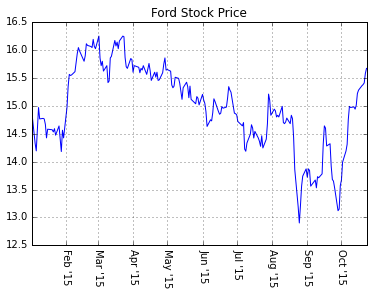

In [74]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

# Let's define x-axis date interval sizes: month, week, or day
month_interval = 3   
months = MonthLocator(interval=month_interval)
month  = MonthLocator(bymonth=range(1,13),  bymonthday=1, interval=1)
week   = WeekdayLocator(byweekday=dateutil.rrule.MO)  # Every MOnday
day    = DayLocator(bymonthday=range(1,32), interval=1)

# Let's define x-axis formatting intervals
monthsFmt = DateFormatter("%b '%y")

ax.xaxis.set_major_locator(month)
ax.xaxis.set_major_formatter(monthsFmt)

plt.plot_date(f.index, f['Adj Close'].values, '-')
plt.xticks(rotation=270)
plt.grid(axis='both')
plt.title("Ford Stock Price")
plt.show()

In [75]:
from ggplot import *

In [76]:
# Converts the index into a column and the new index will be 0...n
f.reset_index(level=0, inplace=True)

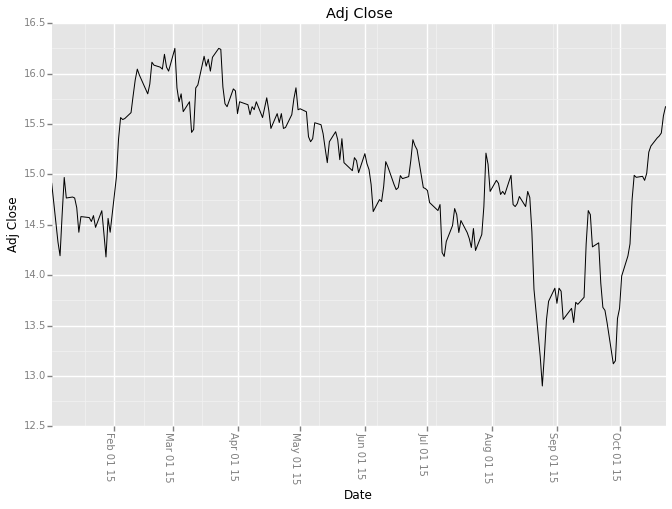

In [90]:
stock_plot = ggplot(f, aes(x='Date', y='Adj Close')) + geom_line() + \
    ggtitle('Adj Close') + \
    scale_x_date(labels='%b %d %y',breaks=date_breaks('month'))
fig = stock_plot.draw()
ax = fig.gca()
labels = ax.get_xticklabels() 
for label in labels: 
    label.set_rotation(270)
plt.show()